In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

hp = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

hp.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [3]:
#examine dataset
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

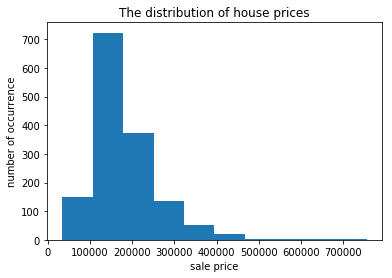

In [4]:
#look at target variable distribution
plt.hist(hp.saleprice)
plt.title("The distribution of house prices")
plt.xlabel("sale price")
plt.ylabel("number of occurrence")
plt.show()

In [33]:
#create list of discrete columns, one numerically discrete and one not, and continuous columns
hp_disc = hp.loc[:, ['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 
             'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl',
             'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
             'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair',
             'electrical', 'kitchenqual', 'functional', 'fireplaces', 'garagetype', 'garagefinish', 'garagequal',
             'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature', 'saletype', 'salecondition']]

hp_cat = hp.loc[:, ['overallqual', 'overallcond', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
                    'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagecars', 'mosold', 'yrsold', 'saleprice']]

hp_cont = hp.loc[:, ['mssubclass', 'lotfrontage', 'lotarea', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 
                     'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 
                     'garageyrblt', 'garagearea', 'wooddecksf','openporchsf', 'threessnporch', 'screenporch', 'poolarea', 
                     'miscval', 'saleprice']]


### Data Exploration
#### Discrete Variables

In [34]:
#Create a dictionary for discrete variables, not numeric
list1 = hp_disc[0:]
list2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
hp_disc_dict = dict( zip( list1, list2))
print(hp_disc_dict)

{'mszoning': 1, 'street': 2, 'alley': 3, 'lotshape': 4, 'landcontour': 5, 'utilities': 6, 'lotconfig': 7, 'landslope': 8, 'neighborhood': 9, 'condition1': 10, 'condition2': 11, 'bldgtype': 12, 'housestyle': 13, 'roofstyle': 14, 'roofmatl': 15, 'exterior1st': 16, 'exterior2nd': 17, 'masvnrtype': 18, 'exterqual': 19, 'extercond': 20, 'foundation': 21, 'bsmtqual': 22, 'bsmtcond': 23, 'bsmtexposure': 24, 'bsmtfintype1': 25, 'bsmtfintype2': 26, 'heating': 27, 'heatingqc': 28, 'centralair': 29, 'electrical': 30, 'kitchenqual': 31, 'functional': 32, 'fireplaces': 33, 'garagetype': 34, 'garagefinish': 35, 'garagequal': 36, 'garagecond': 37, 'paveddrive': 38, 'poolqc': 39, 'fence': 40, 'miscfeature': 41, 'saletype': 42}


In [7]:
#Create a dictionary for categorical variables, numeric
list1 = hp_cat[0:]
list2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
hp_cat_dict = dict( zip( list1, list2))
print(hp_cat_dict)

{'overallqual': 1, 'overallcond': 2, 'bsmtfullbath': 3, 'bsmthalfbath': 4, 'fullbath': 5, 'halfbath': 6, 'bedroomabvgr': 7, 'kitchenabvgr': 8, 'totrmsabvgrd': 9, 'fireplaces': 10, 'garagecars': 11, 'mosold': 12, 'yrsold': 13, 'saleprice': 14}


In [32]:
hp['bsmtfintype2'].info()

AttributeError: 'Series' object has no attribute 'info'

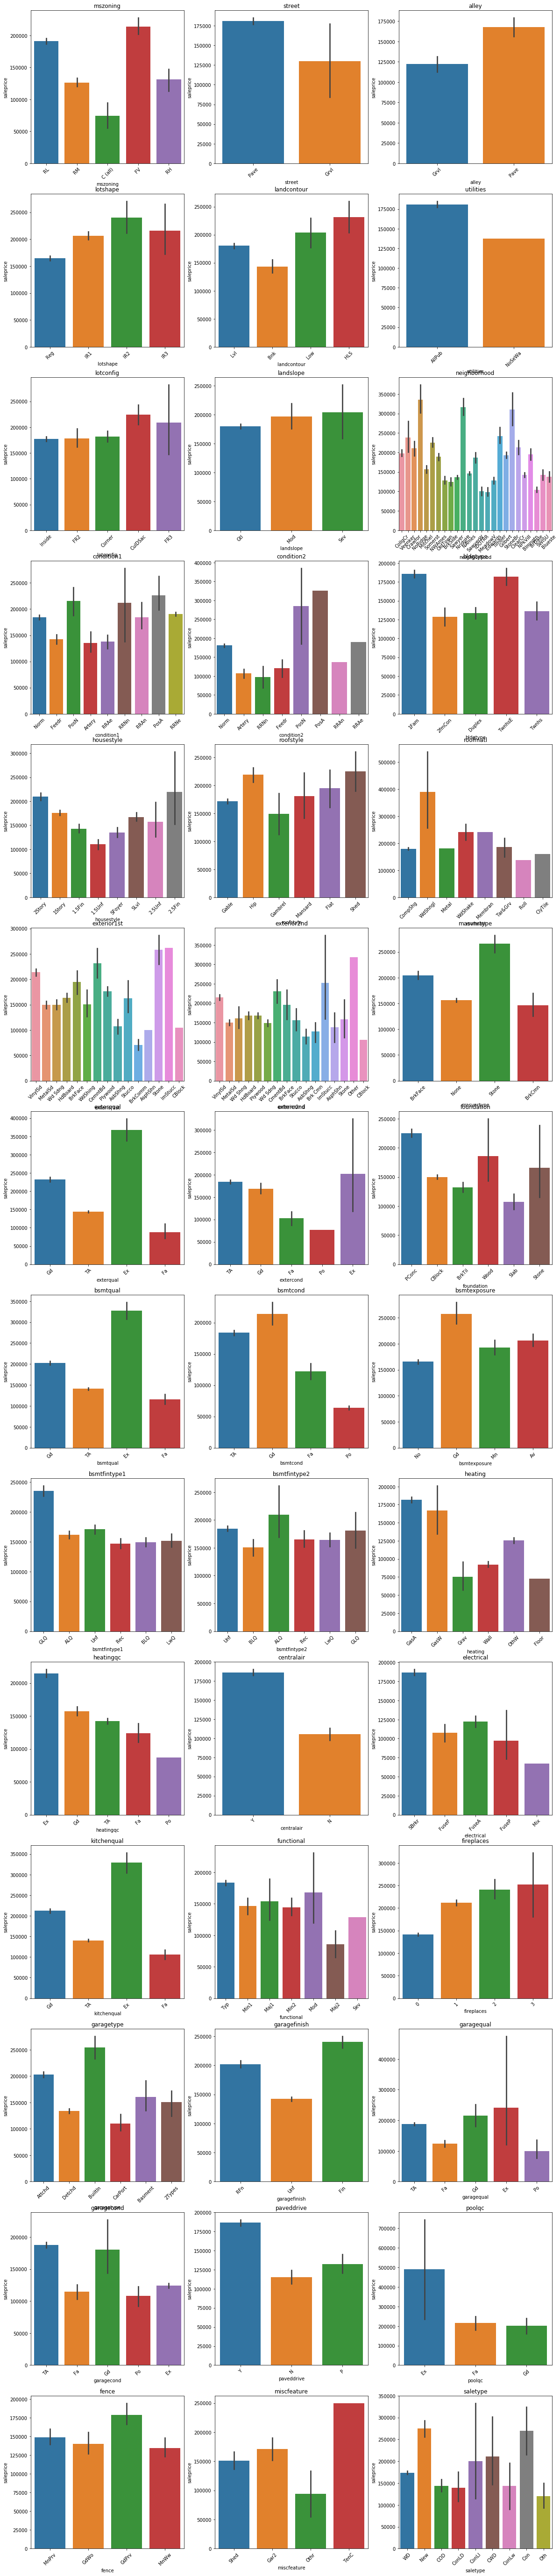

In [35]:
#visualizing discrete, non-numeric variables
plt.figure(figsize=(20,100))

for variable, i in hp_disc_dict.items():
                     plt.subplot(14, 3, i)
                     sns.barplot(hp_disc[variable], hp['saleprice'])
                     plt.xticks(rotation = 45)
                     plt.title(variable)


plt.show()

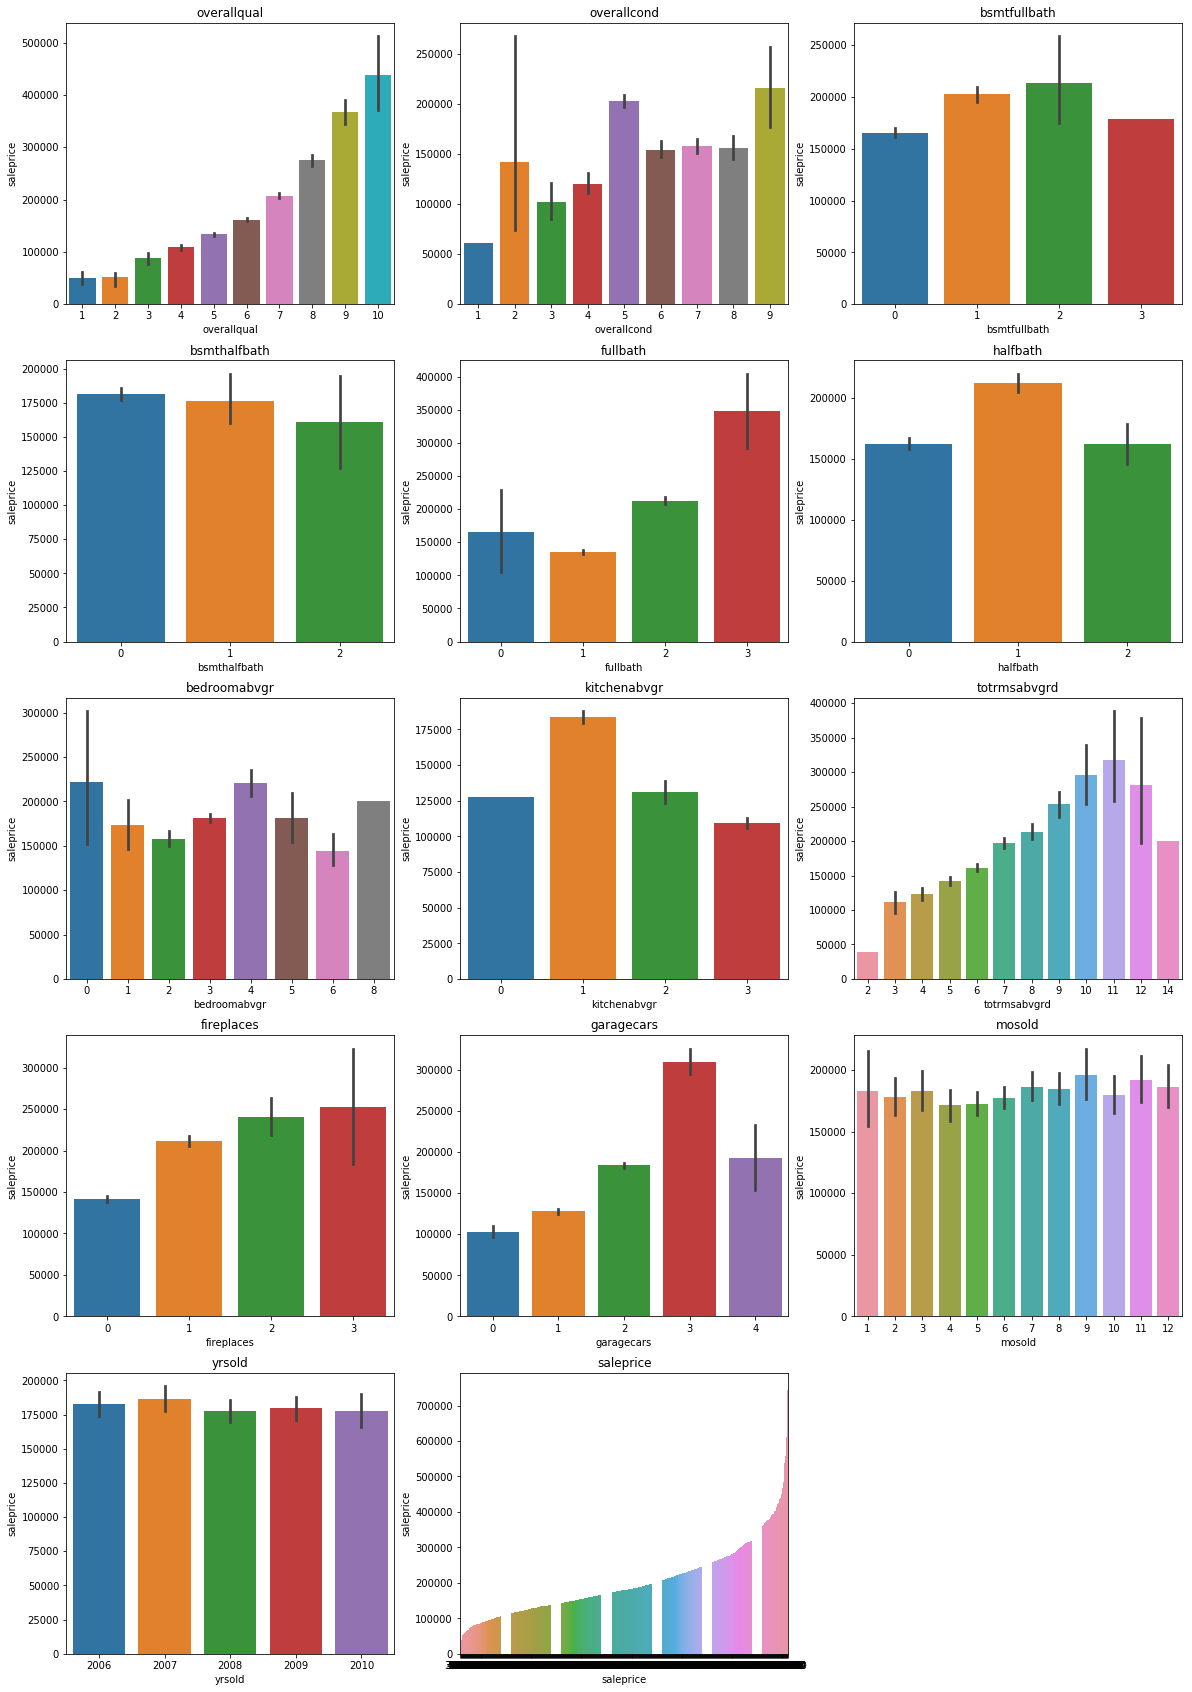

In [9]:
#visualizing discrete, numeric variables
plt.figure(figsize=(20,30))

for variable, i in hp_cat_dict.items():
                     plt.subplot(5, 3, i)
                     sns.barplot(hp_cat[variable], hp_cat['saleprice'])
                     plt.title(variable)


plt.show()

Looking at the discrete variables, garagecars, fullbath, and overallqual seem to have the biggest effect on saleprice.

### Data Cleaning and Exploration
#### Continuous variables 

In [10]:
#find null values
hp_cont.isnull().sum()*100/hp_cont.isnull().count()

mssubclass        0.000000
lotfrontage      17.739726
lotarea           0.000000
yearbuilt         0.000000
yearremodadd      0.000000
masvnrarea        0.547945
bsmtfinsf1        0.000000
bsmtfinsf2        0.000000
bsmtunfsf         0.000000
totalbsmtsf       0.000000
firstflrsf        0.000000
secondflrsf       0.000000
lowqualfinsf      0.000000
grlivarea         0.000000
garageyrblt       5.547945
garagearea        0.000000
wooddecksf        0.000000
openporchsf       0.000000
threessnporch     0.000000
screenporch       0.000000
poolarea          0.000000
miscval           0.000000
saleprice         0.000000
dtype: float64

In [11]:
#fill in missing values with averages
#I've chosen to ignore the garage year built variable
hp_cont['lotfrontage'].fillna(hp_cont['lotfrontage'].mean(), inplace = True)
hp_cont['masvnrarea'].fillna(hp_cont['masvnrarea'].mean(), inplace = True)

In [12]:
#look for abnormal values
for column_name in hp_cont.columns:
    print("Unique values in column {} are: {}".format(column_name, hp_cont[column_name].unique()))

Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column lotfrontage are: [ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  64.          94.          34.          90.          55.
  88.          82.          71.         120.         107.
  92.         134.          62.          86.         141.
  97.          54.          41.          79.         174.
  99.          67.          83.          43.         103.
  93.          30.         129.         140. 

Doesn't appear to be any strange or blank values present in our continuous variables. 

In [13]:
#Create a dictionary for continuous variables
list1 = hp_cont[0:]
list2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
hp_cont_dict = dict( zip( list1, list2))
print(hp_cont_dict)

{'mssubclass': 1, 'lotfrontage': 2, 'lotarea': 3, 'yearbuilt': 4, 'yearremodadd': 5, 'masvnrarea': 6, 'bsmtfinsf1': 7, 'bsmtfinsf2': 8, 'bsmtunfsf': 9, 'totalbsmtsf': 10, 'firstflrsf': 11, 'secondflrsf': 12, 'lowqualfinsf': 13, 'grlivarea': 14, 'garageyrblt': 15, 'garagearea': 16, 'wooddecksf': 17, 'openporchsf': 18, 'threessnporch': 19, 'screenporch': 20, 'poolarea': 21, 'miscval': 22, 'saleprice': 23}


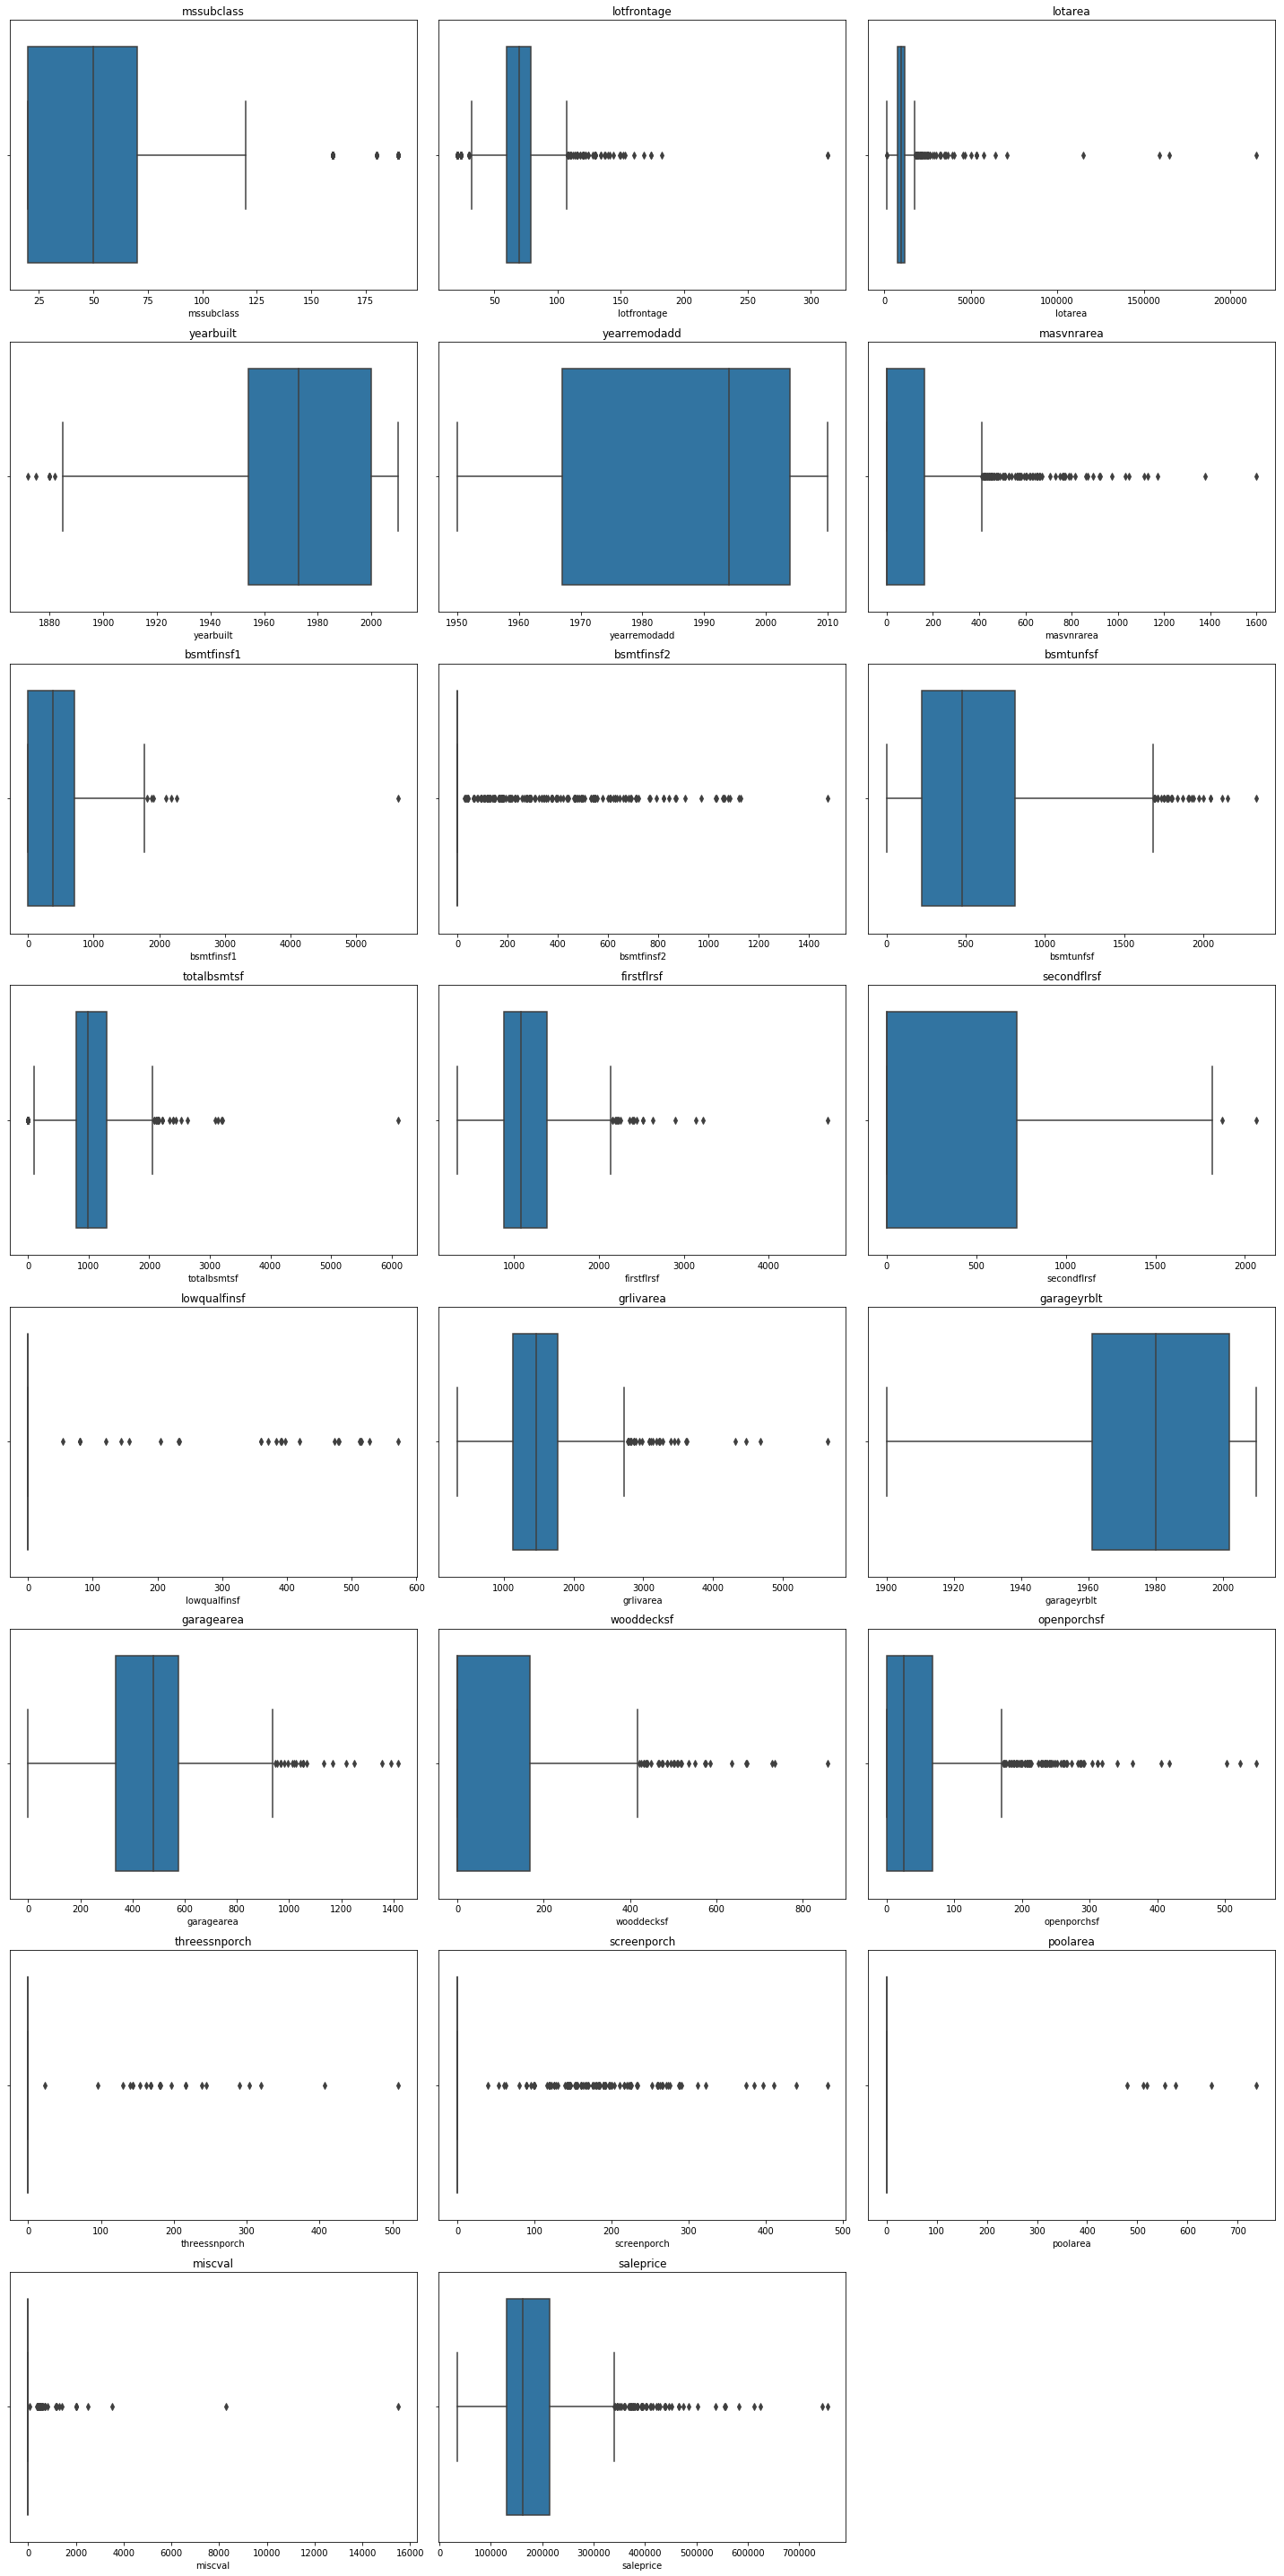

In [14]:
plt.figure(figsize=(20,40))

for variable, i in hp_cont_dict.items():
                     plt.subplot(8, 3, i)
                     sns.boxplot(hp_cont[variable])
                     plt.title(variable)

plt.tight_layout()
plt.show()

In [15]:
#clean up some of the variables with outliers by winsorization
import scipy.stats as stats
from scipy.stats.mstats import winsorize

hp_cont['wins_lotfrontage'] = winsorize(hp_cont['lotfrontage'], (0, 0.05))
hp_cont['wins_lotarea'] = winsorize(hp_cont['lotarea'], (0, 0.05))
hp_cont['wins_masvnrarea'] = winsorize(hp_cont['masvnrarea'], (0, 0.05))
hp_cont['wins_bsmtfinsf1'] = winsorize(hp_cont['bsmtfinsf1'], (0, 0.05))
hp_cont['wins_bsmtunfsf'] = winsorize(hp_cont['bsmtunfsf'], (0, 0.05))
hp_cont['wins_totalbsmtsf'] = winsorize(hp_cont['totalbsmtsf'], (0, 0.05))
hp_cont['wins_firstflrsf'] = winsorize(hp_cont['firstflrsf'], (0, 0.05))
hp_cont['wins_grlivarea'] = winsorize(hp_cont['grlivarea'], (0, 0.05))
hp_cont['wins_garagearea'] = winsorize(hp_cont['garagearea'], (0, 0.05))
hp_cont['wins_wooddecksf'] = winsorize(hp_cont['wooddecksf'], (0, 0.05))
hp_cont['wins_openporchsf'] = winsorize(hp_cont['openporchsf'], (0, 0.05))
hp_cont['wins_saleprice'] = winsorize(hp_cont['saleprice'], (0, 0.05))

In [16]:
#drop unwinsorized columns for correlation 
hp_cont.drop(columns = ['lotfrontage', 'lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtunfsf', 'totalbsmtsf', 
                         'firstflrsf', 'grlivarea', 'garagearea', 'wooddecksf', 'openporchsf', 'saleprice'],
              inplace = True)

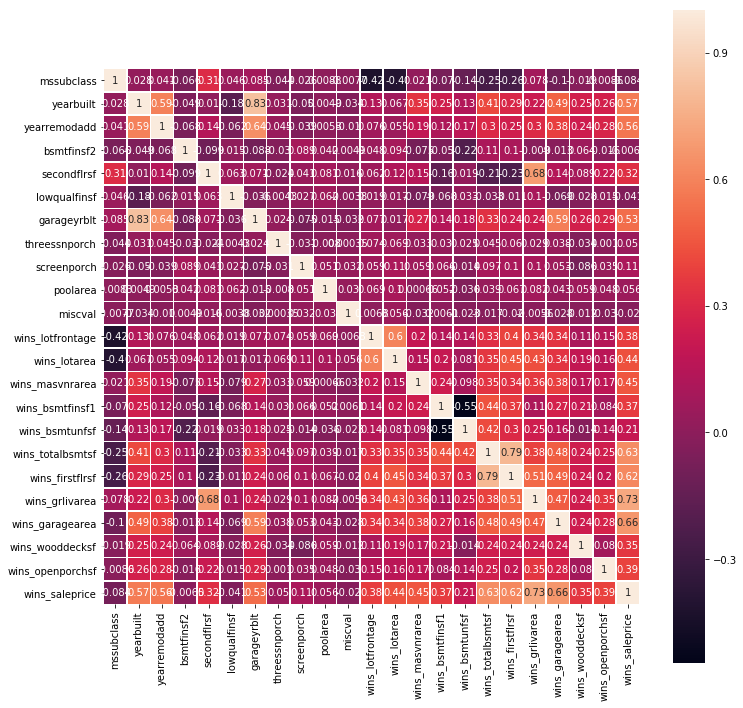

In [17]:
cor_map = hp_cont.corr()

fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(cor_map, square=True, annot=True, linewidths=.5, ax = ax)

{'mssubclass': 1, 'yearbuilt': 2, 'yearremodadd': 3, 'bsmtfinsf2': 4, 'secondflrsf': 5, 'lowqualfinsf': 6, 'garageyrblt': 7, 'threessnporch': 8, 'screenporch': 9, 'poolarea': 10, 'miscval': 11, 'wins_lotfrontage': 12, 'wins_lotarea': 13, 'wins_masvnrarea': 14, 'wins_bsmtfinsf1': 15, 'wins_bsmtunfsf': 16, 'wins_totalbsmtsf': 17, 'wins_firstflrsf': 18, 'wins_grlivarea': 19, 'wins_garagearea': 20, 'wins_wooddecksf': 21, 'wins_openporchsf': 22, 'wins_saleprice': 23}


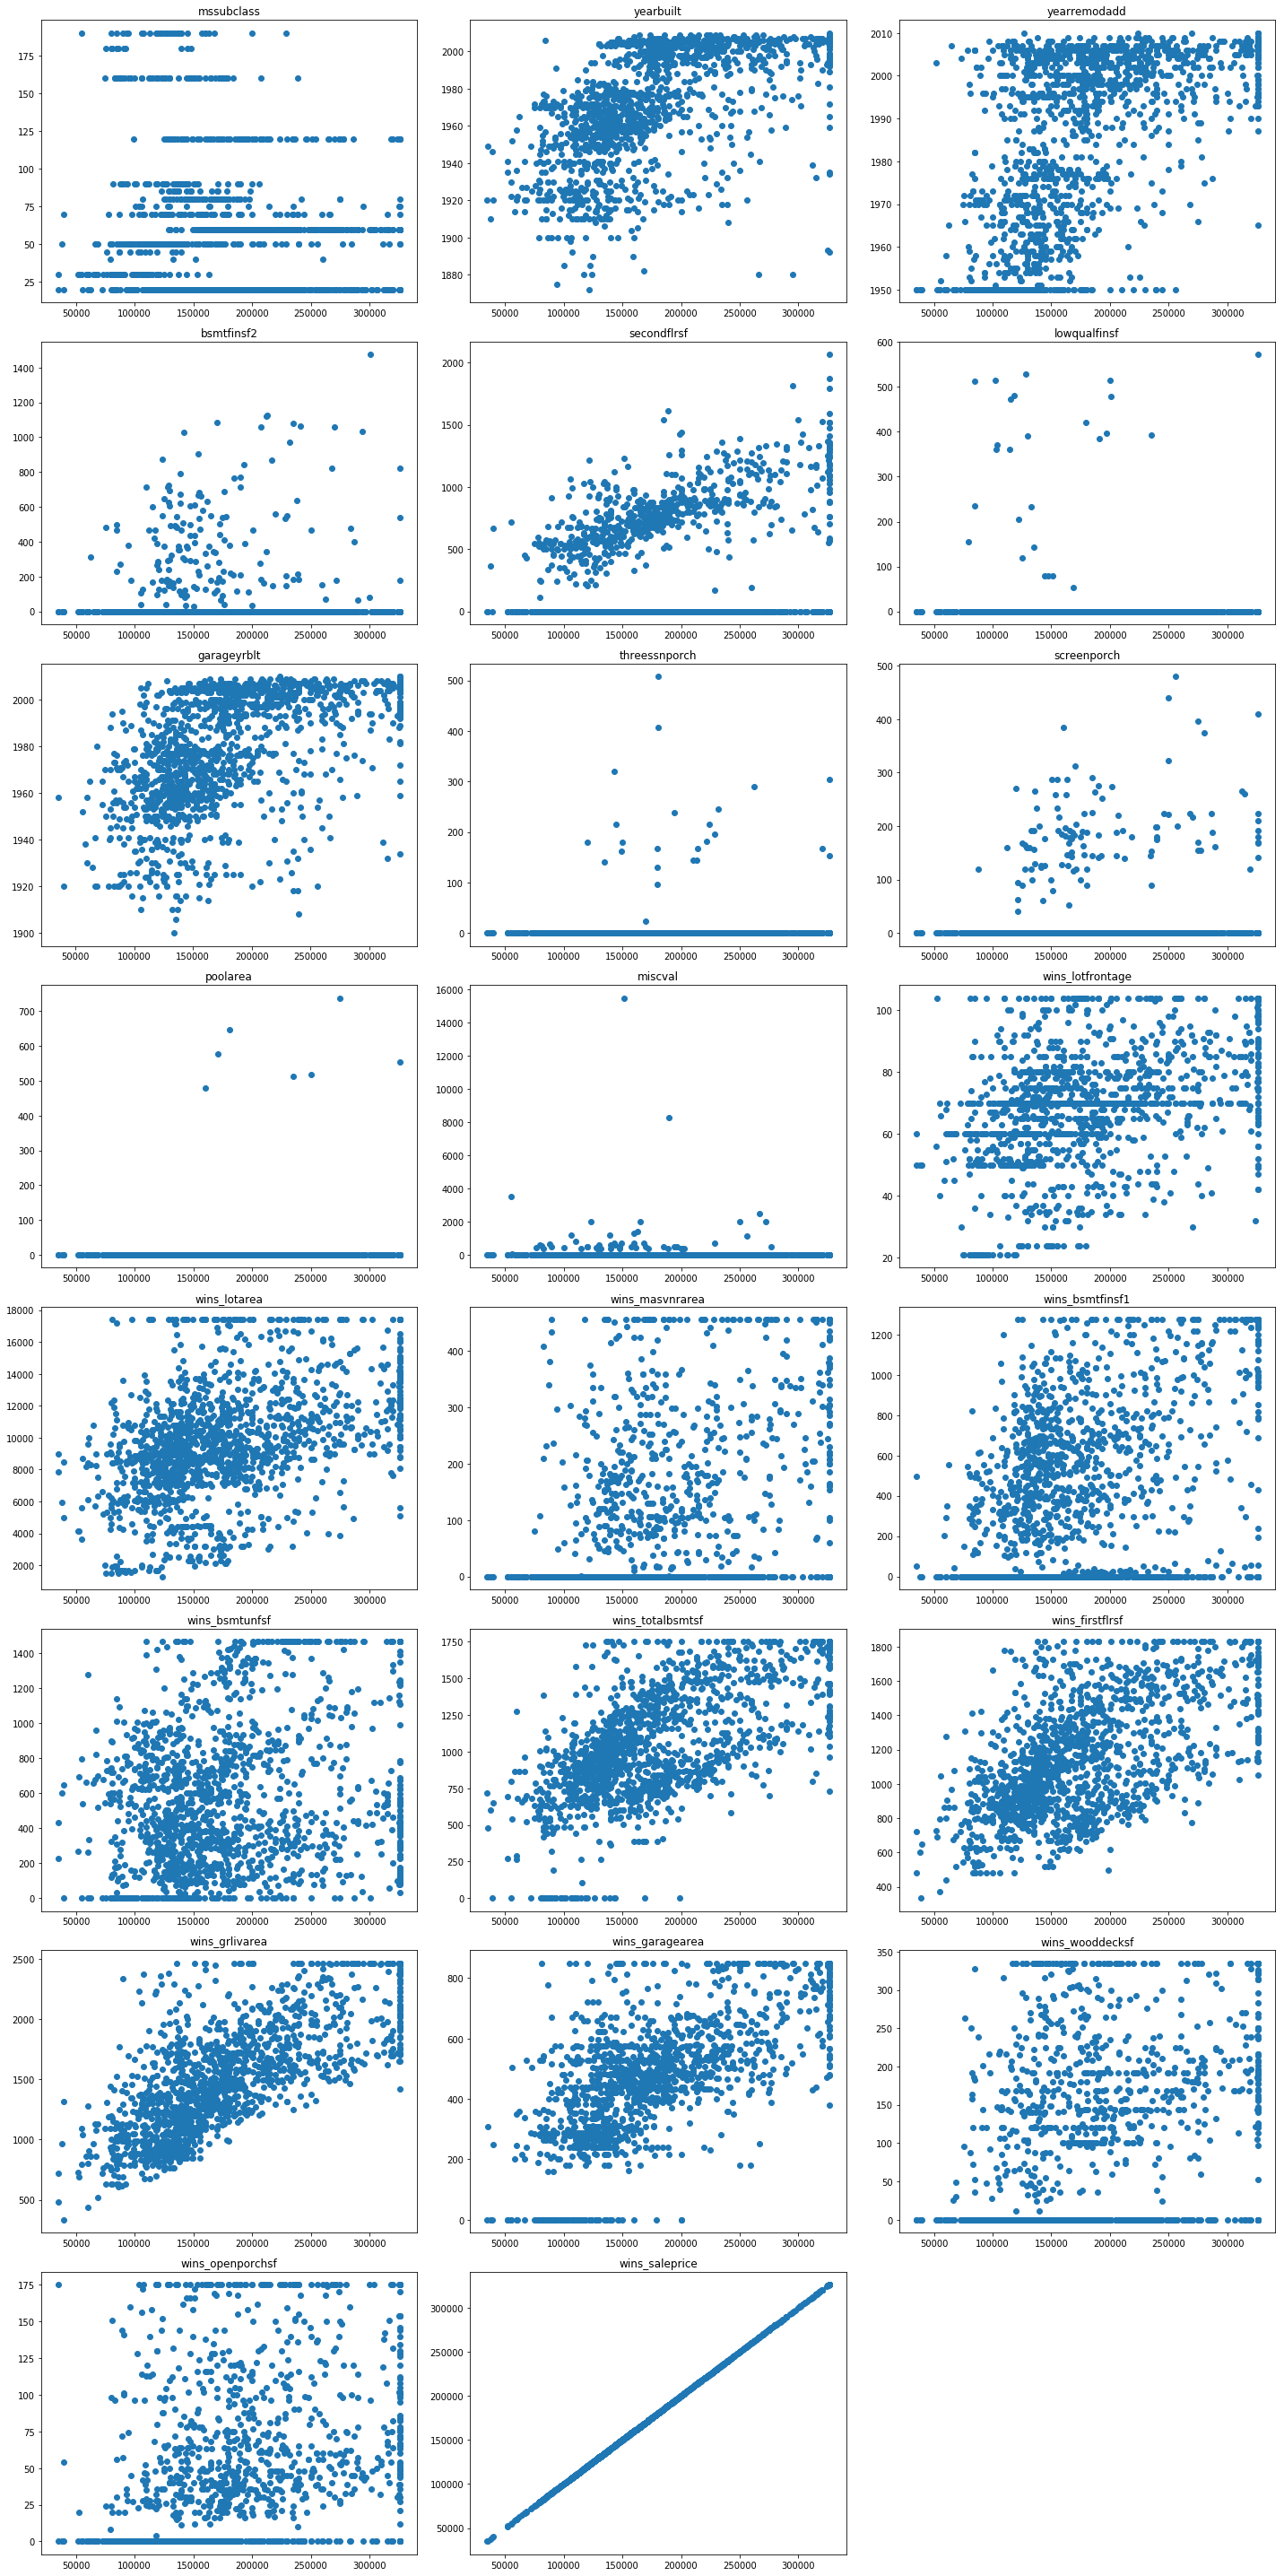

In [18]:
list1 = hp_cont[0:]
list2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
hp_cont2_dict = dict( zip( list1, list2))
print(hp_cont2_dict)

plt.figure(figsize=(20,40))

for variable, i in hp_cont2_dict.items():
                     plt.subplot(8, 3, i)
                     plt.scatter(x = hp_cont['wins_saleprice'], y = hp_cont[variable])
                     plt.title(variable)

plt.tight_layout()
plt.show()

Looking at all the continuous variables that have been cleaned, it appears that the most correlated variables to saleprice are garagearea, grlivarea, firstflrsf, and totalbsmtsf. We will use these four variables along with the other variables we found previously to build our regression model. 

In [69]:
#add winsorized variables to original dataframe
hp['wins_grlivarea'] = winsorize(hp_cont['grlivarea'], (0, 0.05))
hp['wins_garagearea'] = winsorize(hp_cont['garagearea'], (0, 0.05))
hp['wins_totalbsmtsf'] = winsorize(hp_cont['totalbsmtsf'], (0, 0.05))
hp['wins_firstflrsf'] = winsorize(hp_cont['firstflrsf'], (0, 0.05))

In [70]:
# Y is the target variable
Y = hp['saleprice']

# X is the feature set 
X = hp[['overallqual', 'fullbath', 'garagecars', 'wins_totalbsmtsf', 'wins_firstflrsf', 'wins_grlivarea','wins_garagearea']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [2.38524512e+04 1.61369838e+03 8.20389341e+03 3.23355847e+01
 1.60425862e+01 4.67026909e+01 3.30621135e+01]

Intercept: 
 -118869.09625681039


In [71]:
import statsmodels.api as sm

# We need to manually add a constant
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     662.0
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:15:08   Log-Likelihood:                -17498.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1452   BIC:                         3.505e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.189e+05   4998.934    -23.779      0.000   -1.29e+05   -1.09e+05
overallqual       2.385e+04   1108.134     21.525      0.000    2.17e+04     2.6e+04
fullbath          1613.6984   2535.776      0.636      0.525   -3360.478    6587.875
garagecars        8203.8934   3209.332      2.556      0.011    1908.470    1.45e+04
wins_totalbsmtsf    32.3356      4.687      6.899      0.000      23.141      41.530
wins_firstflrsf     16.0426      5.319      3.016      0.003       5.609      26.476
wins_grlivarea      46.7027      3.339     13.987      0.000      40.153      53.253
wins_garagearea     33.0621     11.666      2.834      0.005      10.179      55.945
==============================================================================
Omnibus:                      786.379   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19210.087
Skew:                           1.995   Prob(JB):                         0.00
Kurtosis:                      20.316   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Meeting the assumptions of Linear Regression

### Assumption one: linearity of the model in its coefficients

In [73]:
list1 = list(X.columns)
list2 = [1, 2, 3, 4, 5, 6, 7]
X_variables = dict( zip( list1, list2))
print(X_variables)

{'overallqual': 1, 'fullbath': 2, 'garagecars': 3, 'wins_totalbsmtsf': 4, 'wins_firstflrsf': 5, 'wins_grlivarea': 6, 'wins_garagearea': 7}


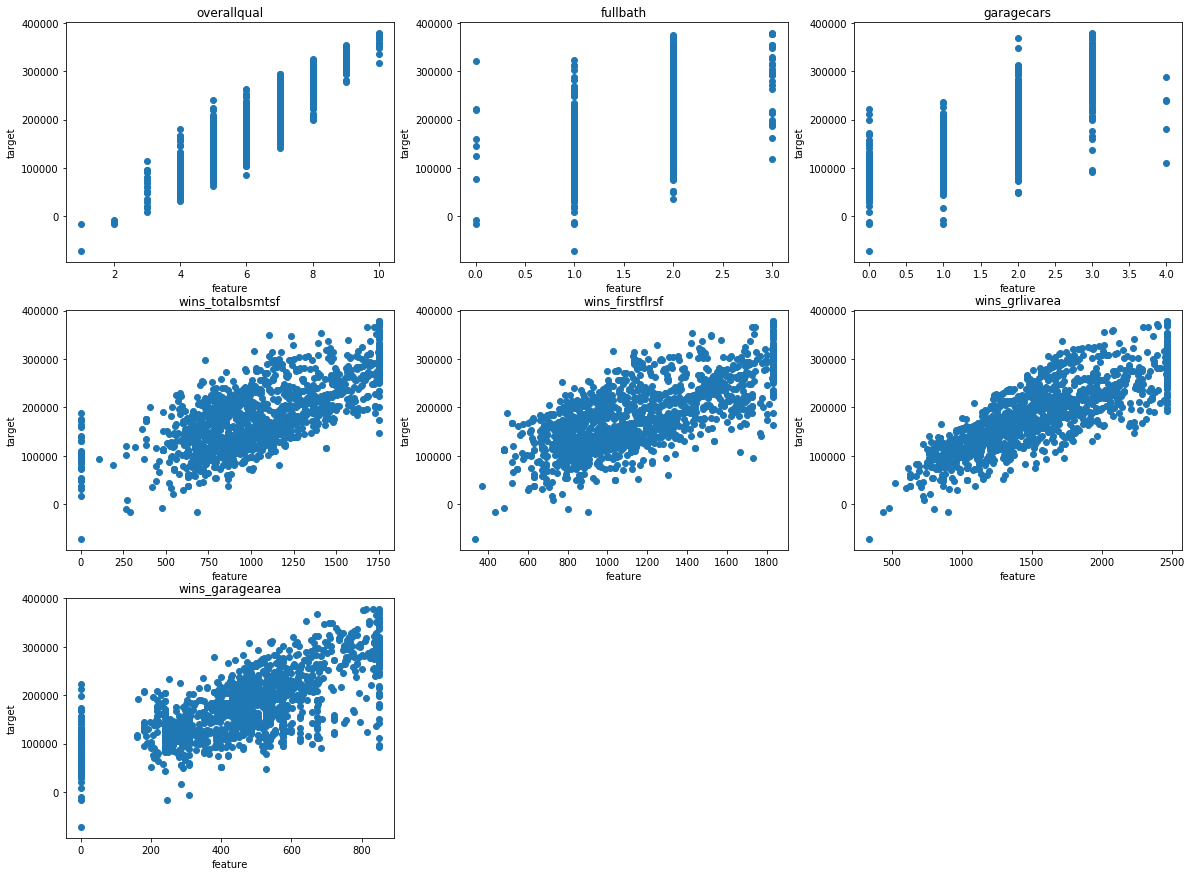

In [74]:
Y = hp['saleprice']
X = hp[['overallqual', 'fullbath', 'garagecars', 'wins_totalbsmtsf', 'wins_firstflrsf', 'wins_grlivarea','wins_garagearea']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

predictions = lrm.predict(X)

plt.figure(figsize=(20,15))


for variable, i in X_variables.items():
                     plt.subplot(3, 3, i)
                     plt.scatter(X[variable], predictions)
                     plt.xlabel("feature")
                     plt.ylabel("target")
                     plt.title(variable)


Assumption met, all are showing a linear relationship

### Assumption two: the error term should be zero on average

In [75]:
errors = Y - predictions

print("Mean of the errors in the houseprices model is: {}".format(np.mean(errors)))

Mean of the errors in the houseprices model is: 3.22733571982547e-11


Assumption met

### Assumption three: homoscedasticity

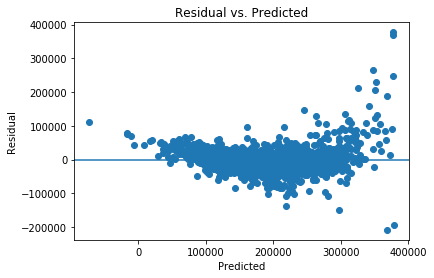

In [76]:
#A model is homoscedastic when the distribution of its error terms (known as "scedasticity") 
#is consistent for all predicted values

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [77]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 465.788 and p value is 2.64e-103
Levene test statistic value is 518.336 and p value is 9.45e-106


Assumption not met, data is heteroscedastic

### Assumption four: low multicollinearity

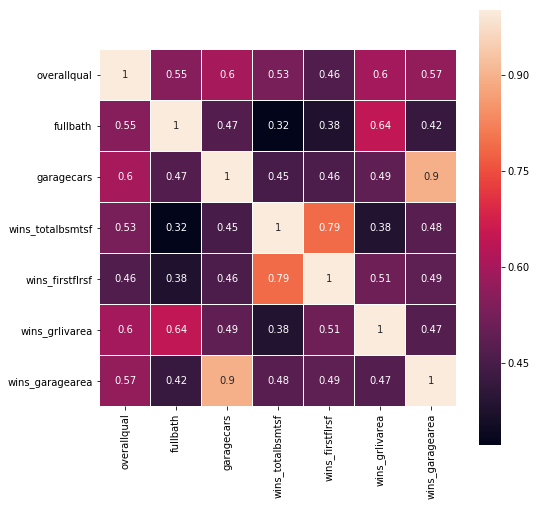

In [78]:
cor_map = X.corr()
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(cor_map, square=True, annot=True, linewidths=.5, ax = ax)

The winsorized garagearea and garagecars variables are highly correlated, should remove one of them. 

### Assumption five: error terms should be uncorrelated with one another

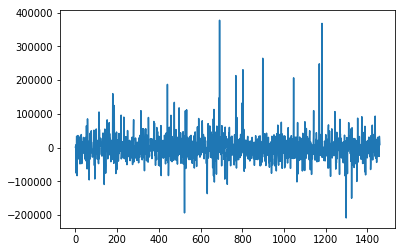

In [79]:
plt.plot(errors)
plt.show()

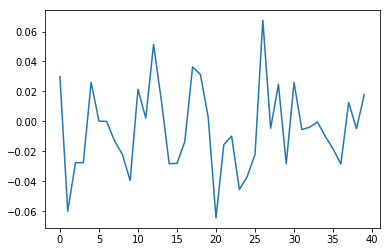

In [80]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

Assumption met, errors do not appear correlated

### Assumption six: features shouldn't be correlated with the errors

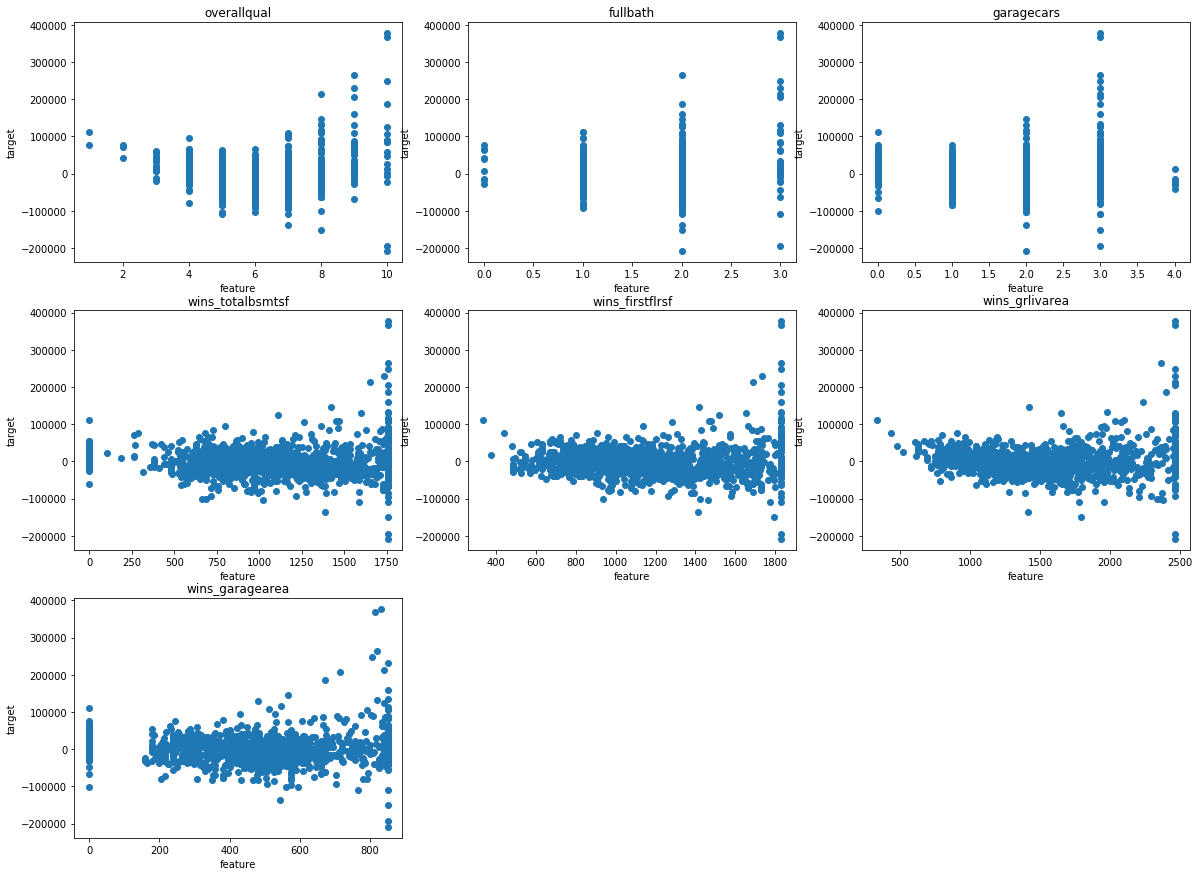

In [83]:
plt.figure(figsize=(20,15))


for variable, i in X_variables.items():
                     plt.subplot(3, 3, i)
                     plt.scatter(X[variable], errors)
                     plt.xlabel("feature")
                     plt.ylabel("target")
                     plt.title(variable)


Assumption met. The features do not appear to be correlated with the errors. 

Text(0.5, 1.0, 'Histogram of the errors')

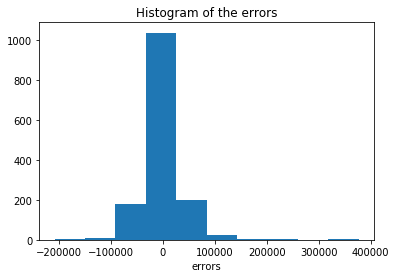

In [81]:
#looking for normality of the error terms

plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

In [82]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 19210.08676329889 and p value is 0.0
Normality test statistics is 786.3790856104937 and p value is 1.737605640219678e-171


The errors are not normally distributed